In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt

# Tải dữ liệu MNIST và chia thành tập huấn luyện và tập kiểm tra
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Chuẩn hóa dữ liệu và chuyển đổi nhãn thành one-hot encoding
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [22]:
from scipy import sparse
import random
class agent:
    def __init__(self,train_images,train_labels):
        self.train_images = train_images
        self.train_labels = train_labels
        self.numOfAction = 10
        self.size_batch = 60000
        self.epsilon = 0.05
        self.apha = 0.1
    def neuron_network(self):
        model = Sequential()
        model.add(Flatten(input_shape=(28, 28))) 
        model.add(Dense(128, activation='relu'))
        model.add(Dense(10))
        model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
        return model
    def predict(self,image):
        if self.model ==None:
            self.model = load_model("train.keras")
        action = np.argmax(self.model.predict(image.reshape(1,28,28),verbose = 0))
        return action
    def get_reward(self,action,index):
        #dùng index thay cho state để lấy trạng thái
        predict_number = action
        reward = -1
        if predict_number == np.argmax(self.train_labels[index]):
            reward = 1
        return reward
    def train(self):
        self.model = self.neuron_network()
        for i in range(20):
            States = np.zeros((self.size_batch,784))
            for index in range(self.size_batch):
                States[index]= self.train_images[index].reshape(1,784)
            qTable = self.model.predict(States.reshape(self.size_batch,28,28))
            for index in range(self.size_batch):
                if random.uniform(0, 1) < self.epsilon:
                    action = np.random.randint(0,10)
                else:
                    action = np.argmax(qTable[index])
                reward = self.get_reward(action,index)
                if reward ==-1:
                    qTable[index,action] = reward*(1-self.apha)+self.apha*qTable[index,action]
                else: qTable[index,action] = reward
            States = States.reshape(self.size_batch,28,28)
            self.model.fit(States,qTable,epochs = 1,batch_size = 100)
        self.model.save("train.keras")
                

In [23]:
ag = agent(train_images,train_labels)
ag.train()

600/600 [==============================] - 2s 4ms/step - loss: 0.0064 - accuracy: 0.9891


In [24]:
for i in range(100):
    action = ag.predict(test_images[i])
    print(action)
    print(np.argmax(test_labels[i]))
    print("=====================================================================")

7
7
2
2
1
1
0
0
4
4
1
1
4
4
9
9
5
5
9
9
0
0
6
6
9
9
0
0
1
1
5
5
9
9
7
7
3
3
4
4
9
9
6
6
6
6
5
5
4
4
0
0
7
7
4
4
0
0
1
1
3
3
1
1
3
3
4
4
7
7
2
2
7
7
1
1
2
2
1
1
1
1
7
7
4
4
2
2
3
3
5
5
1
1
2
2
4
4
4
4
6
6
3
3
5
5
5
5
6
6
0
0
4
4
1
1
9
9
5
5
7
7
8
8
9
9
3
3
7
7
4
4
6
6
4
4
3
3
0
0
7
7
0
0
2
2
9
9
1
1
7
7
3
3
2
2
9
9
7
7
7
7
6
6
2
2
7
7
8
8
4
4
7
7
3
3
6
6
1
1
3
3
6
6
9
9
3
3
1
1
4
4
1
1
7
7
6
6
9
9


9


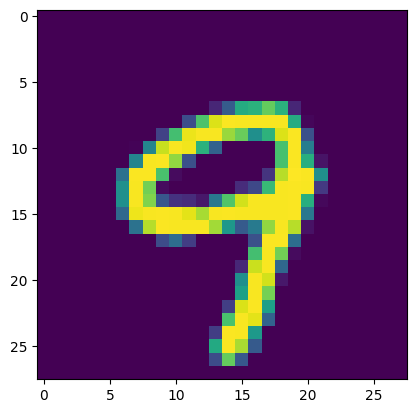

In [26]:
model = load_model("train.keras")
action = np.argmax(model.predict(test_images[58].reshape(1,28,28),verbose=0))
print(action)
plt.imshow(test_images[58])